## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

F:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
# training samples 60000
# testing samples 10000

In [14]:
""

''

### Find dimensions of an image in the dataset

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train.shape[1:]

(28, 28)

In [4]:
x_test.shape[1:]

(28, 28)

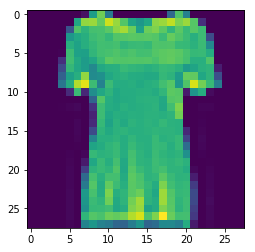

In [5]:
plt.imshow(x_train[10])

In [7]:
import pandas as pd
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [8]:
import tensorflow as tf

In [9]:
y_train_cat = tf.keras.utils.to_categorical(y_train)

In [10]:
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [11]:
y_train.shape

(60000,)

In [12]:
import pandas as pd
import numpy as np

### Normalize both the train and test image data from 0-255 to 0-1

In [25]:
type(x_train)

numpy.ndarray

In [26]:
x_train.dtype

dtype('uint8')

In [27]:
x_train = x_train.astype('float32')

In [28]:
x_train_nor = x_train / 255.0

In [29]:
x_test =x_test.astype('float32')

In [30]:
x_test_nor = x_test / 255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [31]:
x_train_reshape = x_train_nor.reshape(60000,28,28,1)

In [32]:
x_test_reshape = x_test_nor.reshape(10000,28,28,1)

### Import the necessary layers from keras to build the model

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [34]:
epochs = 10
patience = 5

In [35]:
# Define model
model_1 = Sequential()

# 1st Conv Layer
model_1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model_1.add(Activation('relu'))

# 2nd Conv Layer
model_1.add(Convolution2D(32, 3, 3))
model_1.add(Activation('relu'))


# Fully Connected Layer
model_1.add(Flatten())
model_1.add(Dense(128))
model_1.add(Activation('relu'))

# Prediction Layer
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

# Loss and Optimizer
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=patience, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model_1
model_1.fit(x_train_reshape, y_train_cat, batch_size=32, nb_epoch=epochs, 
          validation_data=(x_test_reshape, y_test_cat), callbacks=callback_list)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\Users\isaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
C:\Users\isaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
C:\Users\isaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 878us/step - loss: 0.3733 - acc: 0.8649 - val_loss: 0.2876 - val_acc: 0.8913
Epoch 2/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.2250 - acc: 0.9170 - val_loss: 0.2437 - val_acc: 0.9116
Epoch 3/10
60000/60000 [==============================] - 42s 705us/step - loss: 0.1606 - acc: 0.9401 - val_loss: 0.2407 - val_acc: 0.9170
Epoch 4/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.1109 - acc: 0.9586 - val_loss: 0.2625 - val_acc: 0.9150
Epoch 5/10
60000/60000 [==============================] - 43s 714us/step - loss: 0.0713 - acc: 0.9740 - val_loss: 0.2823 - val_acc: 0.9182
Epoch 6/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.0463 - acc: 0.9830 - val_loss: 0.3507 - val_acc: 0.9089
Epoch 7/10
60000/60000 [==============================] - 43s 710us/step - loss: 0.0347 - acc: 0.9878 - val_loss: 0.

In [36]:
loss_and_metrics = model_1.evaluate(x_test_reshape, y_test_cat)
print(loss_and_metrics)

10000/10000 [==============================] - 2s 188us/step
[0.5088573532633484, 0.9136]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [37]:

# Define Model
model_2 = Sequential()

# 1st Conv Layer
model_2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model_2.add(Activation('relu'))

# 2nd Conv Layer
model_2.add(Convolution2D(32, 3, 3))
model_2.add(Activation('relu'))

# Max Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model_2.add(Dropout(0.25))

# Fully Connected Layer
model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(Activation('relu'))

# More Dropout
#model_2.add(Dropout(0.25))

# Prediction Layer
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

# Loss and Optimizer
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model_2.fit(x_train_reshape, y_train_cat, batch_size=32, nb_epoch=10, 
          validation_data=(x_test_reshape, y_test_cat), callbacks=callback_list)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\isaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
C:\Users\isaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\isaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 516us/step - loss: 0.3917 - acc: 0.8601 - val_loss: 0.2905 - val_acc: 0.8925
Epoch 2/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.2527 - acc: 0.9073 - val_loss: 0.2542 - val_acc: 0.9076
Epoch 3/10
60000/60000 [==============================] - 30s 506us/step - loss: 0.2065 - acc: 0.9241 - val_loss: 0.2328 - val_acc: 0.9167
Epoch 4/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.1744 - acc: 0.9349 - val_loss: 0.2242 - val_acc: 0.9190
Epoch 5/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.1483 - acc: 0.9450 - val_loss: 0.2180 - val_acc: 0.9207
Epoch 6/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.1271 - acc: 0.9513 - val_loss: 0.2317 - val_acc: 0.9212
Epoch 7/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.1099 - acc: 0.9578 - val_loss: 0.

In [38]:
loss_and_metrics = model_2.evaluate(x_test_reshape, y_test_cat)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 121us/step
[0.30226916245520113, 0.9219]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [39]:
from keras.preprocessing.image import ImageDataGenerator

In [41]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train_reshape)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

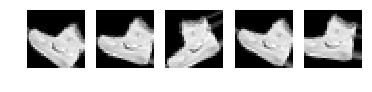

In [42]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshape[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [44]:
model_2.fit_generator(datagen.flow(x_train_reshape, y_train_cat, batch_size = 500), validation_data = (x_test_reshape
                                                                                                , y_test_cat),steps_per_epoch=120,
epochs = 10)

Epoch 1/10
120/120 [==============================] - 18s 151ms/step - loss: 1.1036 - acc: 0.6271 - val_loss: 0.3177 - val_acc: 0.8921
Epoch 2/10
120/120 [==============================] - 17s 143ms/step - loss: 0.7134 - acc: 0.7327 - val_loss: 0.3165 - val_acc: 0.8917
Epoch 3/10
120/120 [==============================] - 18s 148ms/step - loss: 0.6345 - acc: 0.7639 - val_loss: 0.3060 - val_acc: 0.8963
Epoch 4/10
120/120 [==============================] - 18s 150ms/step - loss: 0.5883 - acc: 0.7821 - val_loss: 0.2953 - val_acc: 0.8974
Epoch 5/10
120/120 [==============================] - 17s 145ms/step - loss: 0.5629 - acc: 0.7907 - val_loss: 0.2977 - val_acc: 0.8979
Epoch 6/10
120/120 [==============================] - 17s 143ms/step - loss: 0.5372 - acc: 0.8014 - val_loss: 0.2906 - val_acc: 0.8985
Epoch 7/10
120/120 [==============================] - 17s 143ms/step - loss: 0.5161 - acc: 0.8078 - val_loss: 0.2881 - val_acc: 0.9015
Epoch 8/10
120/120 [==============================] - 1

###  Report the final train and validation accuracy

In [45]:
loss_and_metrics = model_2.evaluate(x_test_reshape, y_test_cat)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 124us/step
[0.28035034173727036, 0.9019]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [46]:
from keras.datasets import cifar10

In [47]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [48]:
x_train.shape

(50000, 32, 32, 3)

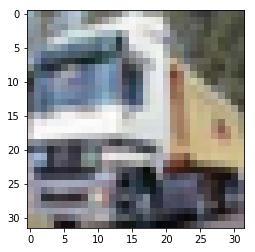

In [49]:
plt.imshow(x_train[1])

In [50]:
x_test.shape

(10000, 32, 32, 3)

In [51]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255.0 ## normalize the training data
x_test /= 255.0 ## normalize the testing data
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [52]:
datagen1 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator


### **Prepare/fit the generator.**

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

In [53]:
# Prepare the generator
datagen1.fit(x_train)

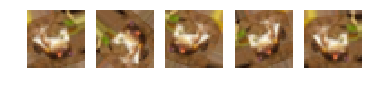

In [54]:
gen = datagen1.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()